In [1]:
# Run this to allow plotting in the notebook
%pylab inline

# Run this to allow using the %%R cell magic
%reload_ext rpy2.ipython

# Suppress warnings (most notable from rpy2)
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%R


library(Seurat)
library(plotrix)
library(scales)
library(ggplot2)
library(cowplot)
library(openxlsx)


R[write to console]: 
Seurat v4 will be going to CRAN in the near future;
 for more details, please visit https://satijalab.org/seurat/v4_changes


R[write to console]: 
Attaching package: ‘scales’


R[write to console]: The following object is masked from ‘package:plotrix’:

    rescale




In [3]:
%%R
load("data/GSE134174_Processed_invivo_seurat.Rdata")

In [4]:
%%R
#Get subset
Idents(T15_int) <- T15_int@meta.data$clusters_10
#pull out cil data 
T15_cil<-subset(T15_int,idents=c("c8"))
#scale and find valuable features 
T15_cil<-ScaleData(T15_cil, assay="integrated")
T15_cil<-FindVariableFeatures(T15_cil, selection.method = "vst", nfeatures = 1500,assay="integrated")

R[write to console]: Centering and scaling data matrix

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |=======================                                               |  33%
  |                                                                            
  |===============================================                       |  67%
  |                                                                            
  |======================================================================| 100%
R[write to console]: 

R[write to console]: Calculating gene variances
R[write to console]: 

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to co

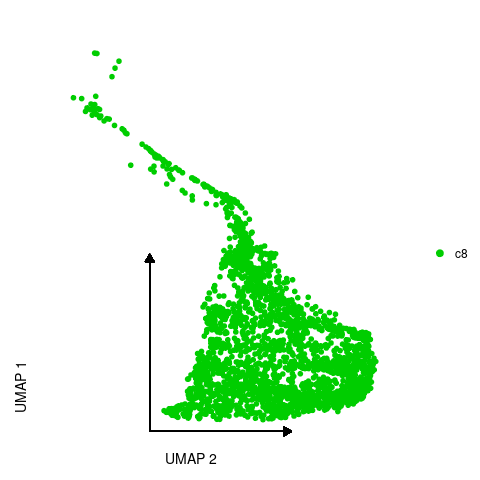

In [5]:
%%R 
#dimplot of cililated data b4 processing 
DimPlot(T15_cil, reduction='umap', label=F, pt.size = 2, cols="green3")+theme(axis.line = element_line(color="white",arrow = arrow(type='closed',length = unit(3,'mm'))))+ggtitle("") +
  xlab("UMAP 2") + ylab("UMAP 1")+scale_x_discrete(labels=NULL)+scale_y_discrete(labels=NULL)+labs(color = "")+geom_segment(aes(x=8 , y = -6, xend =10, yend = -6),
                  arrow = arrow(type="closed",length = unit(3, "mm")))+geom_segment(aes(x = 8, y = -6, xend =8, yend = 0),
                  arrow = arrow(type="closed",length = unit(3, "mm")))+theme(
axis.title.x = element_text(color="black", size=14,hjust=.4 ),
axis.title.y = element_text(color="black", size=14,vjust=.4,hjust=0.1),
axis.ticks = element_blank(), legend.title=element_text("")
)


R[write to console]: PC_ 1 
Positive:  C20orf85, C1orf194, TPPP3, C9orf24, CETN2, DYNLL1, PIFO, CAPS, FAM183A, CAPSL 
	   RSPH1, UFC1, C9orf116, MORN2, SNTN, DYNLRB2, TCTEX1D2, AL357093.2, CIB1, OMG 
	   POLR2I, PRDX5, C11orf97, TUBA1A, SMIM22, C5orf49, SPA17, CYSTM1, ODF3B, CFAP300 
Negative:  F3, CXCL8, CSTA, S100A14, AQP5, KLK11, FOSB, PRSS23, SOX4, CXCL2 
	   EPAS1, OAT, SERPINF1, ADIRF, SERPINB3, CD44, KLF6, NFKBIA, CXCL1, GPRC5A 
	   S100A16, MGST1, EEF2, KRT15, ATP1B3, HES1, MDK, HSPB1, MSMB, KRT5 
PC_ 2 
Positive:  CCNO, WFDC2, HES6, MSLN, H2AFZ, TXN, LYZ, LCN2, CDC42EP5, MUC5B 
	   LYPD2, TFF3, RANBP1, BTG3, PI3, TCN1, BPIFB1, CARHSP1, HELLS, UGT2A1 
	   GCNT3, VMO1, HNRNPAB, DEUP1, CXCL6, CYP2F1, CKS2, CEACAM5, CRACR2B, SPRR3 
Negative:  CFAP157, CCDC17, CDHR3, RP1, EFHC1, DNAH12, ERICH3, SPEF2, DNAH2, NEAT1 
	   DNAH11, DSP, CFAP43, ABCA5, PLXNB2, CDHR4, AFDN, CFAP54, GABPB1-AS1, AQP3 
	   HYDIN, WSB1, HSPA5, HSP90B1, PROM1, KRT5, DLEC1, FAM227A, CES4A, RABL2B 
PC_ 3 
Positi

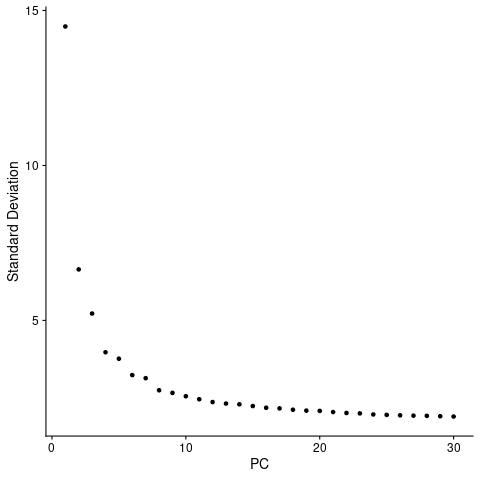

In [6]:
%%R
#Run pca
T15_cil<- RunPCA(T15_cil, npcs = 30, verbose = TRUE)
#visually determine number of features 
ElbowPlot(T15_cil,ndims=30) 

In [7]:
%%R
#Look at heat maps
pdf("DimHeatmaps.pdf")
DimHeatmap(T15_cil, reduction="pca", dims = 1:6, cells = 500, balanced = TRUE)
DimHeatmap(T15_cil, reduction="pca", dims = 7:12, cells = 500, balanced = TRUE)
DimHeatmap(T15_cil, reduction="pca", dims = 13:18, cells = 500, balanced = TRUE)
DimHeatmap(T15_cil, reduction="pca", dims = 19:24, cells = 500, balanced = TRUE)
DimHeatmap(T15_cil, reduction="pca", dims = 25:30, cells = 500, balanced = TRUE)
dev.off()

png 
  2 


R[write to console]: Warning:
R[write to console]:  The following arguments are not used: reduction.use

R[write to console]: Suggested parameter: reduction instead of reduction.use


R[write to console]: Warning:
R[write to console]:  The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session

R[write to console]: 21:16:42 UMAP embedding parameters a = 0.583 b = 1.334

R[write to console]: 21:16:42 Read 2356 rows and found 22 numeric columns

R[write to console]: 21:16:42 Using Annoy for neighbor search, n_neighbors = 10

R[write to console]: 21:16:42 Building Annoy index with metric = cosine, n_trees = 50

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2356
Number of edges: 114496

Running Louvain algorithm...


R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: 

Maximum modularity in 10 random starts: 0.9239
Number of communities: 3
Elapsed time: 0 seconds


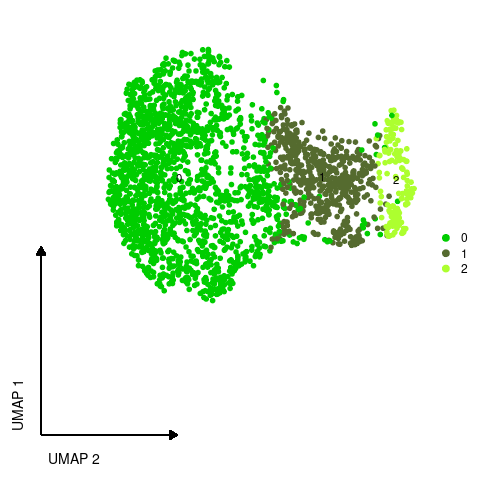

In [8]:
%%R
##run cil umap after final adjustments 
#for umap coloring
nPCs<-22
colorVec<-c("green3","darkolivegreen","greenyellow","red","purple","tan","black","green","magenta","saddlebrown")
	
#Run umap across different values of hyperparameters
T15_cil <- RunUMAP(T15_cil, reduction.use = "pca", dims=1:nPCs, n.neighbors = 10, min.dist = 0.5)
#do neighboring and clustering 
T15_cil <- FindNeighbors(object = T15_cil, dims = 1:nPCs)
T15_cil <- FindClusters(T15_cil, reduction.type="pca", resolution=0.1, algorithm=1)
#look at cil after final processing 
DimPlot(T15_cil, reduction='umap', label=T, pt.size = 2, cols=colorVec)+theme(axis.line = element_line(color="white",arrow = arrow(type='closed',length = unit(3,'mm'))))+ggtitle("") +
  xlab("UMAP 2") + ylab("UMAP 1")+theme(
axis.title.x = element_text(color="black", size=14,hjust=0.05 ),
axis.title.y = element_text(color="black", size=14, hjust=0.05),
axis.ticks = element_blank(), legend.title=element_text("")
)+scale_x_discrete(labels=NULL)+scale_y_discrete(labels=NULL)+labs(color = "")+geom_segment(aes(x = -11, y = -11, xend =-11, yend = -3),
                  arrow = arrow(type="closed",length = unit(3, "mm")))+geom_segment(aes(x = -11, y = -11, xend =-3, yend = -11),
                  arrow = arrow(type="closed",length = unit(3, "mm")))



In [9]:
%%R
#Add back original clusters
treat.col<-data.frame("clusters_3"=rep(NA,ncol(GetAssayData(T15_cil))),row.names=rownames(T15_cil@meta.data),stringsAsFactors=F)
treat.col[which(T15_cil@meta.data$integrated_snn_res.0.1 == 0),]<-"c8c"
treat.col[which(T15_cil@meta.data$integrated_snn_res.0.1 == 1),]<-"c8b"
treat.col[which(T15_cil@meta.data$integrated_snn_res.0.1 == 2),]<-"c8a"
T15_cil<-AddMetaData(T15_cil,metadata=treat.col,col.name="clusters_3")



In [10]:
%%R
#indent for naming purposes on graph, helps with proper coloring 
high <- c("c8a","c8b", "c8ac","c1","c1c","c2","c3","c4","c5","c6ab","c6c","c7")  
T15_int <- SetIdent(object=T15_int, value = "")  
T15_int <- StashIdent(T15_int, save.name = "expr")  


R[write to console]: With Seurat 3.X, stashing identity classes can be accomplished with the following:
T15_int[["expr"]] <- Idents(object = T15_int)



In [11]:
%%R
###My figure FINAL
#####Overlay these new clusters onto the global UMAP
treat.col<-data.frame("cil_subclusters"=T15_int@meta.data$clusters_10,row.names=rownames(T15_int@meta.data),stringsAsFactors=F)
treat.col[,1]<-as.character(treat.col[,1])
treat.col[rownames(T15_int@meta.data)[which(rownames(T15_int@meta.data) %in% rownames(T15_cil@meta.data)[which(T15_cil@meta.data$clusters_3 == "c8a")])],]<-"1. Hybrid secretory/early ciliating"
treat.col[rownames(T15_int@meta.data)[which(rownames(T15_int@meta.data) %in% rownames(T15_cil@meta.data)[which(T15_cil@meta.data$clusters_3 == "c8b")])],]<-"2. Mature Ciliated A"
treat.col[rownames(T15_int@meta.data)[which(rownames(T15_int@meta.data) %in% rownames(T15_cil@meta.data)[which(T15_cil@meta.data$clusters_3 == "c8c")])],]<-"3. Mature Ciliated B"
#update names for stuff we didnt process 
treat.col[rownames(T15_int@meta.data)[which(rownames(T15_int@meta.data) %in% rownames(T15_int@meta.data)[which(T15_int@meta.data$clusters_10 == "c1")])],]<-"Proliferating basal"
treat.col[rownames(T15_int@meta.data)[which(rownames(T15_int@meta.data) %in% rownames(T15_int@meta.data)[which(T15_int@meta.data$clusters_10 == "c1c")])],]<-"Proteasomal basal"
treat.col[rownames(T15_int@meta.data)[which(rownames(T15_int@meta.data) %in% rownames(T15_int@meta.data)[which(T15_int@meta.data$clusters_10 == "c2")])],]<-"Differentiating basal"
treat.col[rownames(T15_int@meta.data)[which(rownames(T15_int@meta.data) %in% rownames(T15_int@meta.data)[which(T15_int@meta.data$clusters_10 == "c3")])],]<-"SMG basal"
treat.col[rownames(T15_int@meta.data)[which(rownames(T15_int@meta.data) %in% rownames(T15_int@meta.data)[which(T15_int@meta.data$clusters_10 == "c4")])],]<-"KRT8 high intermediate"
treat.col[rownames(T15_int@meta.data)[which(rownames(T15_int@meta.data) %in% rownames(T15_int@meta.data)[which(T15_int@meta.data$clusters_10 == "c5")])],]<-"Mucus secretory"
treat.col[rownames(T15_int@meta.data)[which(rownames(T15_int@meta.data) %in% rownames(T15_int@meta.data)[which(T15_int@meta.data$clusters_10 == "c6ab")])],]<-"Ioncyte tuft"
treat.col[rownames(T15_int@meta.data)[which(rownames(T15_int@meta.data) %in% rownames(T15_int@meta.data)[which(T15_int@meta.data$clusters_10 == "c6c")])],]<-"PNEC"
treat.col[rownames(T15_int@meta.data)[which(rownames(T15_int@meta.data) %in% rownames(T15_int@meta.data)[which(T15_int@meta.data$clusters_10 == "c7")])],]<-"SMG secretory"

T15_int<-AddMetaData(T15_int,metadata=treat.col,col.name="cil_subclusters")
colorVec<-c("green3","green3","green3","#3281FF","gold4","tomato","orange","tan","#1619BA","mediumpurple3","darkturquoise","saddlebrown")

#save final figure as pdf for better formatting
dev.new(height=5,width=7)
#use naming from new ident, group by newly processed cil data, hide axis but add axis titles 
p<-DimPlot(T15_int, reduction='umap', label=F, pt.size = 0.3, cols=colorVec,group.by="cil_subclusters",shape.by="expr",raster=FALSE)+theme(axis.line = element_line(color="white",arrow = arrow(type='closed',length = unit(3,'mm'))))+ggtitle("") +
  xlab("UMAP 2") + ylab("UMAP 1")
#place axis titles to be centered 
p+theme(
axis.title.x = element_text(color="black", size=14,hjust=0.05 ),
axis.title.y = element_text(color="black", size=14, hjust=0.05),
axis.ticks = element_blank(), legend.title=element_text("")
)+scale_x_discrete(labels=NULL)+scale_y_discrete(labels=NULL)+labs(color = "")+geom_segment(aes(x = -11, y = -11, xend =-11, yend = -3),
                  arrow = arrow(type="closed",length = unit(3, "mm")))+geom_segment(aes(x = -11, y = -11, xend =-3, yend = -11),
                  arrow = arrow(type="closed",length = unit(3, "mm")))




R[write to console]: dev.new(): using pdf(file="Rplots9.pdf")



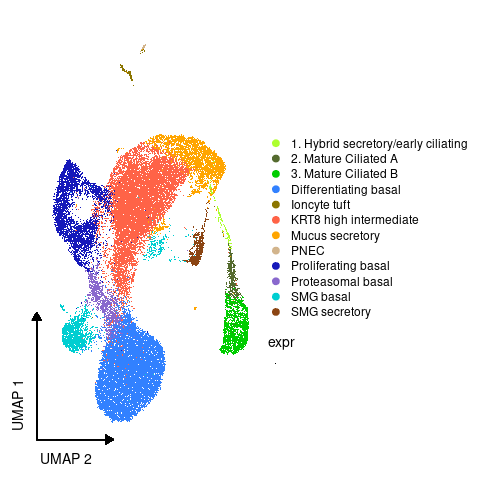

In [12]:
%%R
#Figure used to show cilated data processing
colorVec<-c("greenyellow","darkolivegreen","green3","#3281FF","gold4","tomato","orange","tan","#1619BA","mediumpurple3","darkturquoise","saddlebrown")

p<-DimPlot(T15_int, reduction='umap', label=F, pt.size = 0.3, cols=colorVec,group.by="cil_subclusters",shape.by="expr",raster=FALSE)+theme(axis.line = element_line(color="white",arrow = arrow(type='closed',length = unit(3,'mm'))))+ggtitle("") +
  xlab("UMAP 2") + ylab("UMAP 1")
p+theme(
axis.title.x = element_text(color="black", size=14,hjust=0.05 ),
axis.title.y = element_text(color="black", size=14, hjust=0.05),
axis.ticks = element_blank(), legend.title=element_text("")
)+scale_x_discrete(labels=NULL)+scale_y_discrete(labels=NULL)+labs(color = "")+geom_segment(aes(x = -11, y = -11, xend =-11, yend = -3),
                  arrow = arrow(type="closed",length = unit(3, "mm")))+geom_segment(aes(x = -11, y = -11, xend =-3, yend = -11),
                  arrow = arrow(type="closed",length = unit(3, "mm")))




In [29]:
%%R
colorVec<-c("#BFBFBF","#BFBFBF","#BFBFBF","#BFBFBF","#BFBFBF","tomato","orange","#BFBFBF","#BFBFBF","#BFBFBF","#BFBFBF","#BFBFBF")
dev.new(height=4,width=7)

d<-DimPlot(T15_int, reduction='umap', label=F, pt.size = 0.3, cols=colorVec,group.by="cil_subclusters",raster=FALSE)+theme(axis.line = element_line(color="white",arrow = arrow(type='closed',length = unit(3,'mm'))))+ggtitle("") +
  xlab("UMAP 2") + ylab("UMAP 1")
d+theme(
axis.title.x = element_text(color="white", size=14,hjust=0.05 ),
axis.title.y = element_text(color="white", size=14, hjust=0.05),
axis.ticks = element_blank(), legend.title=element_text("")
)+scale_x_discrete(labels=NULL)+scale_y_discrete(labels=NULL)+labs(color = "")


R[write to console]: dev.new(): using pdf(file="Rplots11.pdf")

